<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch10_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Logistic Regression

In [ ]:
!pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins

In [ ]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins['Adelie'] = penguins['species']
penguins['Adelie'].replace({'Adelie': 1, 'Gentoo': 0, 'Chinstrap': 0}, inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1


In [ ]:
penguins = penguins.dropna()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(penguins[["bill_length_mm", "bill_depth_mm", "flipper_length_mm"]],
                                                   penguins[["Adelie"]], test_size=0.2, stratify=penguins[["Adelie"]])

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1])

In [ ]:
lr.coef_

array([[-1.54860678,  1.9243329 ,  0.05730186]])

In [ ]:
lr.intercept_

array([16.11442642])

logit (prob of Adelie) = log(prob of Adelie / 1-prob of Adelie) = B0 + B1 x_1 + B2 x_2 + B3 x_3

Odds of being an Adelie penguin: \\
decrease by 77% [exp(-1.45521207) = 0.23] with longer bill_length_mm   \\
increase by 536% [exp(1.84905782) = 6.36] with longer bill_depth_mm \\
increase by 8% [exp(0.07855219) = 1.08] with longer flipper_length_mm

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9850746268656716

In [ ]:
recall_score(y_test, y_pred)

0.9655172413793104

In [ ]:
precision_score(y_test, y_pred)

1.0

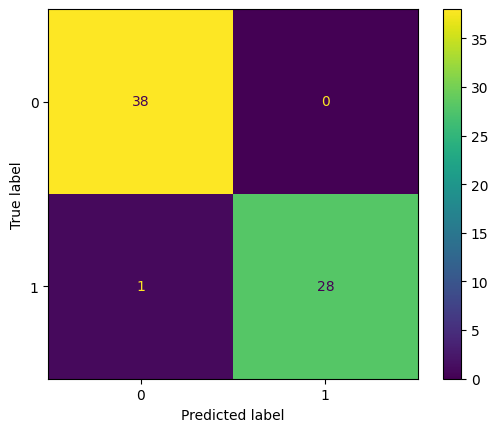

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()

In [ ]:
import statsmodels.api as sm

In [ ]:
log_reg = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.020477
         Iterations 14


In [ ]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Adelie   No. Observations:                  266
Model:                          Logit   Df Residuals:                      263
Method:                           MLE   Df Model:                            2
Date:                Mon, 06 May 2024   Pseudo R-squ.:                  0.9701
Time:                        20:26:36   Log-Likelihood:                -5.4470
converged:                       True   LL-Null:                       -182.45
Covariance Type:            nonrobust   LLR p-value:                 1.348e-77
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
bill_length_mm       -4.1544      2.008     -2.069      0.039      -8.090      -0.219
bill_depth_mm         6.6958      3.135      2.136      0.033       0.552      12.840
flipper_length_mm     0.3054      0.172      1.777      0.076      -0.031       0.642
=====================================================================================

Possibly complete quasi-separation: A fraction 0.89 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Create a logistic regression model to predict whether the pengiun is Gentoo

## Poisson Regression

In [ ]:
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import train_test_split

In [ ]:
url = "http://www.stat.columbia.edu/~gelman/arm/examples/police/frisk_with_noise.dat"
frisk = pd.read_csv(url, skiprows=6, delimiter=" ")

Dataset from Andrew Gelman, Jeffrey Fagan & Alex Kiss (2007) An Analysis of the New York City Police Department’s “Stop-and-Frisk” Policy in the Context of Claims of Racial Bias, Journal of the American Statistical Association, 102:479, 813-823.

stops: The number of police stops between January 1998 and March 1999, for each combination of precinct, ethnicity and type of crime.
pop: The population.

past.arrests: The number of arrests that took place in 1997 for each combination of precinct, ethnicity and type of crime.

precinct: Index for the precinct (1-75).

eth: Indicator for ethnicity, black (1), hispanic (2), white (3).

crime: Indicator for the type, violent (1), weapons (2), property (3), drug (4).

In [ ]:
frisk

,stops,pop,past.arrests,precinct,eth,crime
0,75,1720,191,1,1,1
1,36,1720,57,1,1,2
2,74,1720,599,1,1,3
3,17,1720,133,1,1,4
4,37,1368,62,1,2,1
...,...,...,...,...,...,...
895,2,3233,4,75,2,4
896,111,61692,181,75,3,1
897,48,61692,38,75,3,2
898,115,61692,61,75,3,3


In [ ]:
frisk['black'] = frisk['eth']
frisk['black'].replace({1:1, 2:0, 3:0}, inplace=True)
frisk.head()

,stops,pop,past.arrests,precinct,eth,crime,black
0,75,1720,191,1,1,1,1
1,36,1720,57,1,1,2,1
2,74,1720,599,1,1,3,1
3,17,1720,133,1,1,4,1
4,37,1368,62,1,2,1,0


In [ ]:
frisk['drug'] = frisk['crime']
frisk['drug'].replace({1:0, 2:0, 3:0, 4:1}, inplace=True)
frisk.head()

,stops,pop,past.arrests,precinct,eth,crime,black,drug
0,75,1720,191,1,1,1,1,0
1,36,1720,57,1,1,2,1,0
2,74,1720,599,1,1,3,1,0
3,17,1720,133,1,1,4,1,1
4,37,1368,62,1,2,1,0,0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(frisk[["black", "drug"]],
                                                   frisk[["stops"]], test_size=0.2)

In [ ]:
pois = PoissonRegressor()

In [ ]:
pois.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


PoissonRegressor()

In [ ]:
pois.coef_

array([ 0.8787621 , -0.92717818])

In [ ]:
pois.intercept_

4.76015933849971

The average observed count is equal to exp(B0 + B1 X_1 + B2 X_2)

The average number of stops is 122 [exp(4.8044) = 122.05] \\
Blacks have 2.16 [exp(0.77) = 2.16] times more stops than non-Blacks. \\
Drug crimes are associated with 60% less stops [exp(-0.92) = 0.40] than other types of crime.

In [ ]:
y_pred = pois.predict(x_test)

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
error = np.subtract(y_pred, y_test)

In [ ]:
error.mean()

-1.8982229733012723

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

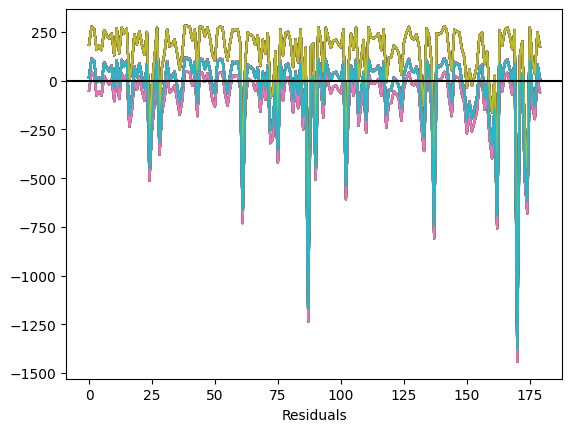

In [ ]:
plt.plot(error)
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [ ]:
pois_reg = sm.GLM(y_train, x_train, family=sm.families.Poisson()).fit()

In [ ]:
pois_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  stops   No. Observations:                  720
Model:                            GLM   Df Residuals:                      718
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.3375e+05
Date:                Mon, 06 May 2024   Deviance:                   4.6325e+05
Time:                        20:36:35   Pearson chi2:                 1.48e+07
No. Iterations:                     8   Pseudo R-squ. (CS):        -1.541e+189
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
black          5.5489      0.005   1191.202      0.000       5.540       5.558
drug          -0.2808      0.010    -27.201      0.000      -0.301      -0.261
==============================================================================
"""

Can you create a Poisson regression model that better predicts the number of arrests? Practice hot encoding. But remember that you can't include all of the hot encoded variables from a nominal variable because they will be highly correlated.

## Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NYSE Dataset from https://www.kaggle.com/datasets/dgawlik/nyse

In [ ]:
stock = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 10/fundamentals.csv')

In [ ]:
stock.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
stock2 = stock[["Earnings Per Share", "Cash Ratio", "After Tax ROE", "Gross Margin", "Current Ratio"]].dropna()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(stock2[["Cash Ratio", "After Tax ROE", "Gross Margin", "Current Ratio"]],
                                                   stock2[["Earnings Per Share"]], test_size=0.2)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([[ 0.00294481, -0.00085929, -0.01079444, -0.00026223]])

In [ ]:
lr.intercept_

array([3.68536771])

y = B0 + B1 x1 + B2 x2 + B3 x3 + B4 x4 + B5 x5

average EPS is 3.7

EPS increases by 0.003 for 1 unit increase in cash ratio \\
EPS decreases by -0.0008 for 1 unit increase in after tax ROE \\
EPS decreases by 0.01 for % increase in gross margin \\
EPS decreases by 0.00003 for % increase in current ratio

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

24.50272829765242

In [ ]:
r2_score(y_test, y_pred)

0.0032290440901243667

In [ ]:
y_test = y_test.to_numpy()

In [ ]:
error = np.subtract(y_pred, y_test)

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

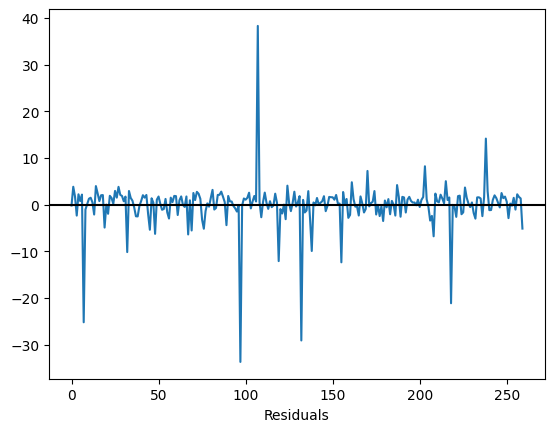

In [ ]:
plt.plot(error)
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [ ]:
ols_reg = sm.OLS(y_train, x_train).fit()

In [ ]:
ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     Earnings Per Share   R-squared (uncentered):                   0.270
Model:                            OLS   Adj. R-squared (uncentered):              0.267
Method:                 Least Squares   F-statistic:                              95.61
Date:                Mon, 06 May 2024   Prob (F-statistic):                    2.97e-69
Time:                        21:16:41   Log-Likelihood:                         -3175.5
No. Observations:                1039   AIC:                                      6359.
Df Residuals:                    1035   BIC:                                      6379.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Cash Ratio       -0.0112      0.003     -4.061      0.000      -0.017      -0.006
After Tax ROE    -0.0005      0.001     -0.851      0.395      -0.002       0.001
Gross Margin      0.0319      0.005      6.343      0.000       0.022       0.042
Current Ratio     0.0126      0.002      6.711      0.000       0.009       0.016
==============================================================================
Omnibus:                      367.190   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            86047.133
Skew:                           0.246   Prob(JB):                         0.00
Kurtosis:                      47.580   Cond. No.                         9.48
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
ridge = Ridge(alpha=2)

In [ ]:
ridge.fit(x_train, y_train)

Ridge(alpha=2)

In [ ]:
ridge.coef_

array([[ 0.0029448 , -0.00085929, -0.01079438, -0.00026222]])

In [ ]:
ridge.intercept_

array([3.68536493])

In [ ]:
y_pred = ridge.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

24.502728702321516

In [ ]:
ridge.score(x_train, y_train)

0.005651519803815952

In [ ]:
ridge.score(x_test, y_test)

0.0032290276281859986

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
alphas = np.arange(1,100,5)
alphas

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [ ]:
ridgecv = RidgeCV(alphas = alphas)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]))

In [ ]:
ridgecv.coef_

array([[ 0.0029443 , -0.00085928, -0.01079194, -0.00026193]])

In [ ]:
ridgecv.intercept_

array([3.6852345])

In [ ]:
y_pred = ridge.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

24.502728702321516

In [ ]:
ridge.score(x_train, y_train)

0.005651519803815952

In [ ]:
ridge.score(x_test, y_test)

0.0032290276281859986

In [ ]:
error = np.subtract(y_pred, y_test)

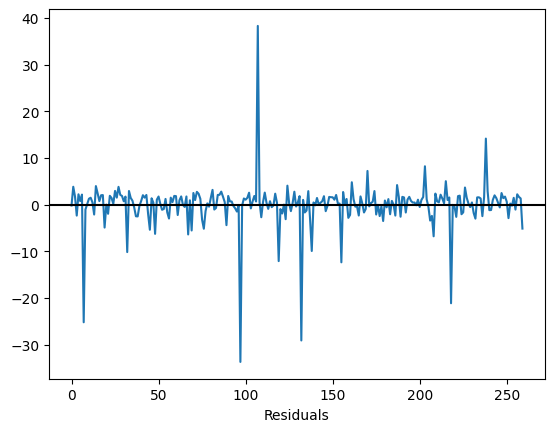

In [ ]:
plt.plot(error)
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

### Lasso Regression

Alpha = how much the variance of the estimates are reduced

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=2)

In [ ]:
lasso.fit(x_train, y_train)

Lasso(alpha=2)

In [ ]:
lasso.coef_

array([ 0.00186249, -0.00082912, -0.00565191,  0.00023148])

In [ ]:
lasso.intercept_

array([3.4325197])

In [ ]:
y_pred = lasso.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

24.54637080771718

In [ ]:
lasso.score(x_train, y_train)

0.0014536668363297478

In [ ]:
lasso.score(x_test, y_test)

In [ ]:
error = np.subtract(y_pred, y_test)

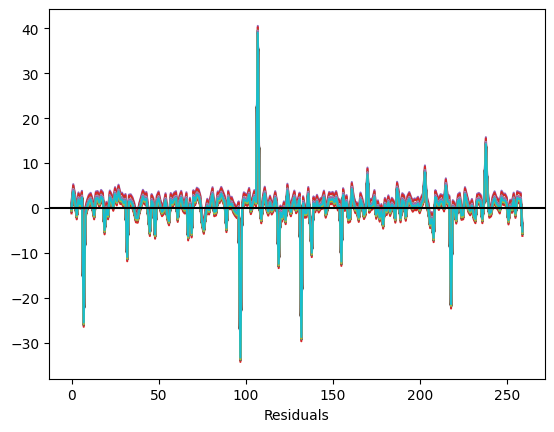

In [ ]:
plt.plot(error)
plt.xlabel('Residuals')
plt.axhline(y=0, color='black', linestyle='-')
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
lassocv = LassoCV(cv = 5)
lassocv.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5)

In [ ]:
lassocv.coef_

array([ 0., -0., -0.,  0.])

In [ ]:
lassocv.intercept_

3.3043984600577483

In [ ]:
y_pred = lassocv.predict(x_test)

In [ ]:
mean_squared_error(y_test, y_pred)

24.588121029652182

In [ ]:
lassocv.score(x_train, y_train)

0.0

In [ ]:
lassocv.score(x_test, y_test)

-0.00024473213875864097

Can you create a beter fitting model to predict earnings per share?

## Overfit Model

In [ ]:
from seaborn import regplot

In [ ]:
ct = pd.read_excel('/content/drive/MyDrive/BI BA Handbook/Chapter 9/forecast.xlsx', sheet_name="Complaints")

In [ ]:
AB = np.polyfit(ct["Period"], ct["Number of Complaints"], 2)
AB

array([-0.09905445,  1.92751196, 60.4254386 ])

In [ ]:
func = np.poly1d(AB)
y_p = func(ct["Period"])

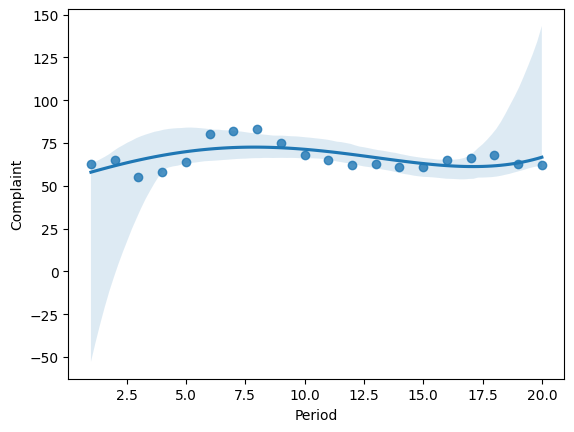

In [ ]:
regplot(x=ct["Period"], y=ct["Number of Complaints"], order=4)
plt.xlabel('Period')
plt.ylabel('Complaint')
plt.show()